# Running Prediction
<div class="row">
  <img src="images/IMG_8553.jpeg" width="210"> 
  <img src="images/IMG_2150.jpeg" width="210">
  <img src="images/IMG_4501.jpeg" width="210"> 
</div>


Many recreational runners, including myself, may want to step up to the next level and sign up for a race to challenge themselves. Race participants often set goals for themselves, such as a sub-two-hour half marathon or a sub-four-hour full marathon. Such a feat requires strategic pacing, efficient running and breathing techniques, and consistent training.

This project will utilize ML algorithms to analyze real running data to develop a predictive model for race finish times. The models will analyze data from Strava (distance, pace, heart rate, elevation, etc) and utilize regression techniques to estimate finish times based on the user’s training patterns. In addition, classification algorithms can be used to separate actual training data from recovery runs or commute runs to improve prediction accuracy.

# Importing Data

The dataset is saved in the repository as "strava_data.csv". We will start by reaeding the file and printing it out.

In [1064]:
import pandas as pd

# Read csv file
strava_data = pd.read_csv('strava_data.csv')

# Print out the dataframe
strava_data

,date,time,distance,avg_speed,max_speed,avg_heartrate,max_heartrate,elevation_gain,avg_power,max_power,total_work,avg_cadence,max_cadence,calories_burned,shoe,run_type
0,2024/5/23,0:18:31,1.96,0:09:24,0:06:02,177,202,0,NaN,NaN,NaN,NaN,NaN,208,Asics Gel-Kayano 28,Training
1,2024/5/28,0:27:00,2.84,0:09:30,0:06:38,168,183,94,NaN,NaN,NaN,NaN,NaN,257,Asics Gel-Kayano 28,Training
2,2024/5/30,0:23:07,2.71,0:08:31,0:06:41,171,190,100,NaN,NaN,NaN,NaN,NaN,251,Asics Gel-Kayano 28,Training
3,2024/6/1,0:11:58,1.43,0:08:22,0:05:00,176,197,170,NaN,NaN,NaN,NaN,NaN,143,Asics Gel-Kayano 28,Training
4,2024/6/3,0:12:53,1.40,0:09:11,0:06:43,171,192,172,NaN,NaN,NaN,NaN,NaN,136,Asics Gel-Kayano 28,Training
5,2024/6/7,0:56:48,5.38,0:10:32,0:07:32,169,191,656,NaN,NaN,NaN,NaN,NaN,530,Asics Gel-Kayano 28,Training
6,2024/6/10,0:08:47,0.80,0:10:55,0:06:53,167,182,0,NaN,NaN,NaN,NaN,NaN,94,Asics Gel-Kayano 28,Recovery
7,2024/6/13,0:18:26,1.98,0:09:17,0:07:04,167,184,206,NaN,NaN,NaN,NaN,NaN,198,Asics Gel-Kayano 28,Training
8,2024/6/17,0:31:29,2.87,0:10:58,0:06:55,163,189,205,NaN,NaN,NaN,NaN,NaN,271,Asics Gel-Kayano 28,Training
9,2024/6/25,0:36:16,3.42,0:10:35,0:06:59,169,183,0,NaN,NaN,NaN,NaN,NaN,454,Asics Gel-Kayano 28,Training


# Organizing Data

Now that we have imported our data, we will organize the data by converting the date attribute into pandas format, sorting the values, checking for null values, and removing duplicates.

In [1065]:
# Convert date attribute
strava_data['date'] = pd.to_datetime(strava_data['date'])

# Ensure data is sorted by date
strava_data.sort_values('date', inplace=True)

# Check for null values (decide whether if I'm gonna get rid of if later)
print(strava_data.isnull().sum())

# Drop duplicates
strava_data = strava_data.drop_duplicates()

# Print out organized dataframe
strava_data


date                0
time                0
distance            0
avg_speed           0
max_speed           0
avg_heartrate       0
max_heartrate       0
elevation_gain      0
avg_power          10
max_power          10
total_work         10
avg_cadence        10
max_cadence        10
calories_burned     0
shoe                0
run_type            0
dtype: int64


,date,time,distance,avg_speed,max_speed,avg_heartrate,max_heartrate,elevation_gain,avg_power,max_power,total_work,avg_cadence,max_cadence,calories_burned,shoe,run_type
0,2024-05-23,0:18:31,1.96,0:09:24,0:06:02,177,202,0,NaN,NaN,NaN,NaN,NaN,208,Asics Gel-Kayano 28,Training
1,2024-05-28,0:27:00,2.84,0:09:30,0:06:38,168,183,94,NaN,NaN,NaN,NaN,NaN,257,Asics Gel-Kayano 28,Training
2,2024-05-30,0:23:07,2.71,0:08:31,0:06:41,171,190,100,NaN,NaN,NaN,NaN,NaN,251,Asics Gel-Kayano 28,Training
3,2024-06-01,0:11:58,1.43,0:08:22,0:05:00,176,197,170,NaN,NaN,NaN,NaN,NaN,143,Asics Gel-Kayano 28,Training
4,2024-06-03,0:12:53,1.40,0:09:11,0:06:43,171,192,172,NaN,NaN,NaN,NaN,NaN,136,Asics Gel-Kayano 28,Training
5,2024-06-07,0:56:48,5.38,0:10:32,0:07:32,169,191,656,NaN,NaN,NaN,NaN,NaN,530,Asics Gel-Kayano 28,Training
6,2024-06-10,0:08:47,0.80,0:10:55,0:06:53,167,182,0,NaN,NaN,NaN,NaN,NaN,94,Asics Gel-Kayano 28,Recovery
7,2024-06-13,0:18:26,1.98,0:09:17,0:07:04,167,184,206,NaN,NaN,NaN,NaN,NaN,198,Asics Gel-Kayano 28,Training
8,2024-06-17,0:31:29,2.87,0:10:58,0:06:55,163,189,205,NaN,NaN,NaN,NaN,NaN,271,Asics Gel-Kayano 28,Training
9,2024-06-25,0:36:16,3.42,0:10:35,0:06:59,169,183,0,NaN,NaN,NaN,NaN,NaN,454,Asics Gel-Kayano 28,Training


# Analyzing & Preprocess Data

Our next step will be performing exploratory data analysis on our running data. We will first print out information and statistics of our dataframe, then explore any relationships and visualize them. 

In [1066]:
# Print information
print(strava_data.info())

# Print summary statistics
print(strava_data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 0 to 42
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             43 non-null     datetime64[ns]
 1   time             43 non-null     object        
 2   distance         43 non-null     float64       
 3   avg_speed        43 non-null     object        
 4   max_speed        43 non-null     object        
 5   avg_heartrate    43 non-null     int64         
 6   max_heartrate    43 non-null     int64         
 7   elevation_gain   43 non-null     int64         
 8   avg_power        33 non-null     float64       
 9   max_power        33 non-null     float64       
 10  total_work       33 non-null     float64       
 11  avg_cadence      33 non-null     float64       
 12  max_cadence      33 non-null     float64       
 13  calories_burned  43 non-null     int64         
 14  shoe             43 non-null     object        
 

We can see that there are several attributes that are type "object". We will convert them into types available for model training.

In [1067]:
# Convert distance to numerical type because it is an object
strava_data['distance'] = pd.to_numeric(strava_data['distance'], errors='coerce')

# Convert 'date' to numerical type (help from ChatGPT)
strava_data['date'] = strava_data['date'].apply(lambda x: x.toordinal())

# Convert avg_speed from "hh:mm:ss" format to total seconds
def convert_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

# Apply the function to the speed attributes
strava_data['avg_speed'] = strava_data['avg_speed'].apply(convert_to_seconds)
strava_data['max_speed'] = strava_data['max_speed'].apply(convert_to_seconds)

# Convert 'duration' to total minutes if in hh:mm:ss format
def convert_to_minutes(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 60 + m + s / 60

strava_data['time'] = strava_data['time'].apply(convert_to_minutes)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
strava_data['shoe'] = label_encoder.fit_transform(strava_data['shoe'])
strava_data['run_type'] = label_encoder.fit_transform(strava_data['run_type'])

Because we are concerned whether if our running pace and distance is improving, we will create plots to visualize our average speed and distance over time. We will first perform linear regression on distance over time and print out the correlation coefficient:

Correlation Coefficient: 0.16405826578745458


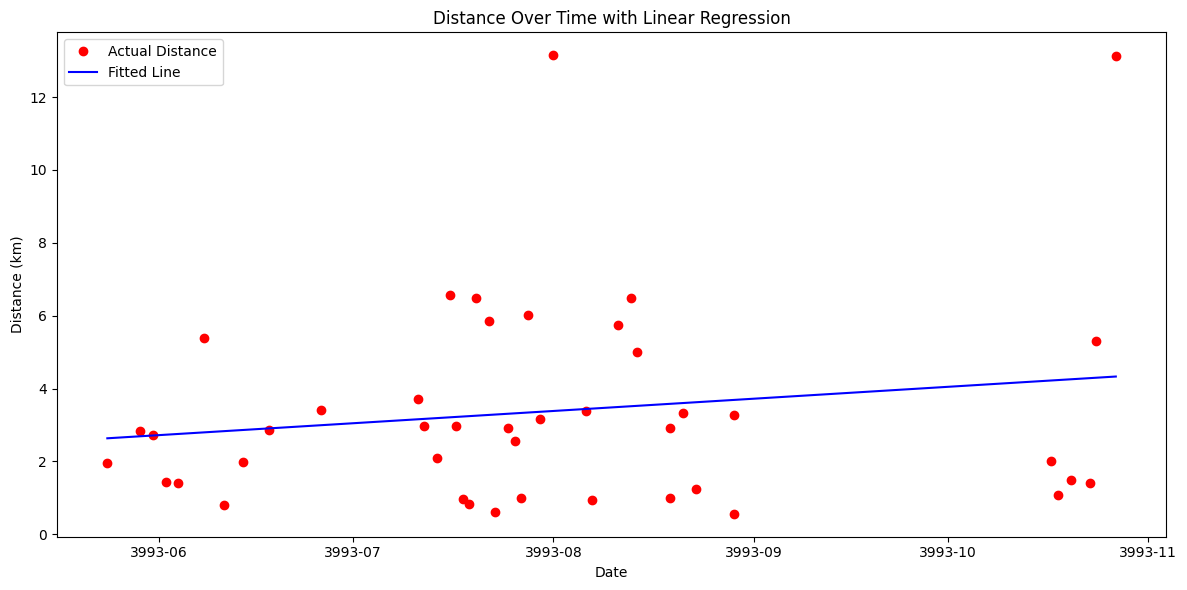

In [1068]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data for linear regression
x = strava_data[['date']]
y = strava_data['distance']

# Create and fit the model
model = LinearRegression()
model.fit(x, y)

# Predict values
predicted_distance = model.predict(x)

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(strava_data['distance'], predicted_distance)[0, 1]
print(f'Correlation Coefficient: {correlation_coefficient}')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(strava_data['date'], strava_data['distance'], marker='o', linestyle='none', color='red', label='Actual Distance')
plt.plot(strava_data['date'], predicted_distance, color='blue', label='Fitted Line', linestyle='-')
plt.title('Distance Over Time with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Distance (km)')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.legend()
plt.tight_layout()
plt.show()

We will do the same thing for our average speed:

Correlation Coefficient for Average Speed: 0.03263625624444491


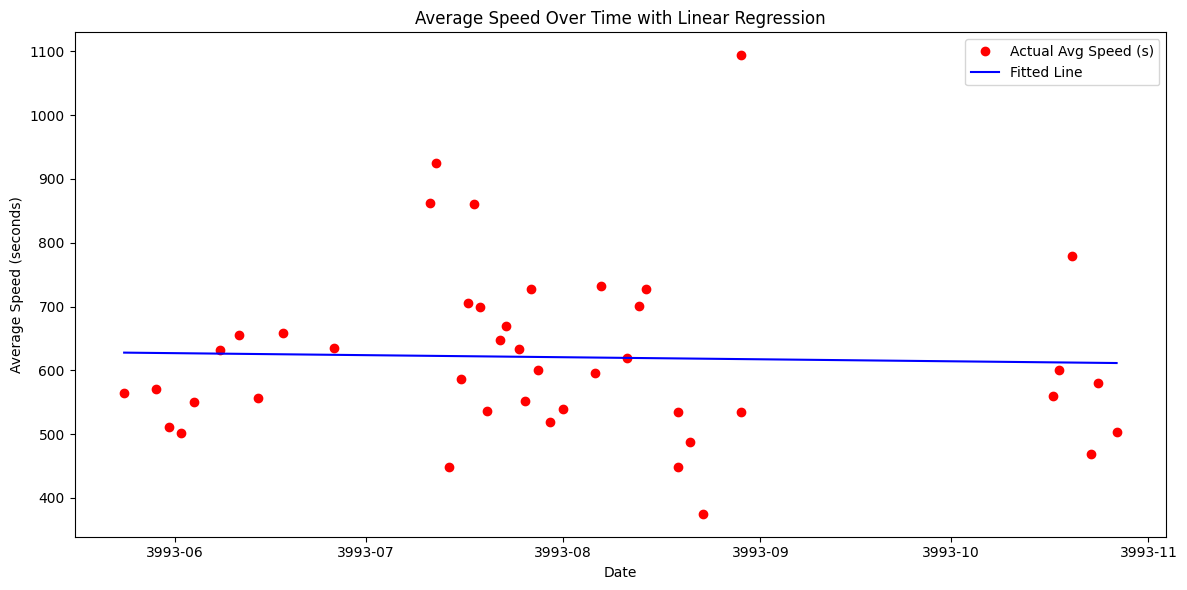

In [1069]:


# Prepare data for linear regression
x = strava_data[['date']]
y = strava_data['avg_speed']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict values
predicted_avg_speed = model.predict(x)

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(strava_data['avg_speed'], predicted_avg_speed)[0, 1]
print(f'Correlation Coefficient for Average Speed: {correlation_coefficient}')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(strava_data['date'], strava_data['avg_speed'], marker='o', linestyle='none', color='red', label='Actual Avg Speed (s)')
plt.plot(strava_data['date'], predicted_avg_speed, color='blue', label='Fitted Line', linestyle='-')
plt.title('Average Speed Over Time with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Average Speed (seconds)')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.legend()
plt.tight_layout()
plt.show()

From the two visualizations and correlation coefficient values, we can tell that there is little to no positiive correlation between average speed and time and distance and time. Distance has a slightly more positive R value than avg_speed, so it could imply that my mileage is increasing. However, this does not prove anything or indicate that we are not improving, as our distance and average speed could be influenced by many other factors. For example, we could be running slower but longer for zone 2 training runs, but faster for a shorter duration for speed workouts, which can all influence our results. To solve this filter out recovery runs before performing linear regression to eliminate this problem.

# Extra: Classification using Decision Tree

Although there is already an attribute for the type of run, I still wanted to train a decision tree for classification because run type classification is not provided in the running app that I use, so it can be a useful feature. We will build our decision tree excluding irrelevant attributes that doesn't change as much in different types of run.

We will be looking at the accuracy, precision, recall, and f1 score of our tree for the results. To improve our tree, we will also be implementing normalization and K-fold cross validation.

Average Accuracy: 0.65
Average Precision: 0.517
Average Recall: 0.525
Average F1 Score: 0.497


(1.0, np.float64(1.0), np.float64(1.0), np.float64(1.0))

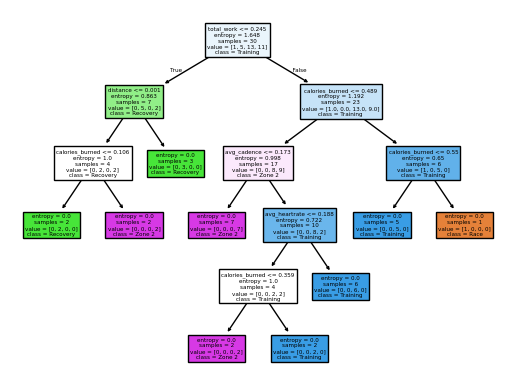

In [1070]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import Normalizer, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
import numpy as np
from sklearn import tree
from statistics import mode
from evaluation_fn import save_results, get_metrics
import os
import importlib
import evaluation_fn
importlib.reload(evaluation_fn)

# Drop the first 10 rows (because they have NaN values)
strava_data = strava_data.iloc[10:]

# Features and target
X = strava_data.drop(columns=['date', 'run_type', 'max_speed', 'max_cadence', 'max_heartrate', 'max_power', 'elevation_gain'])
y = strava_data['run_type']

# Normalize the features
scaler = Normalizer()
X_scaled = scaler.fit_transform(X)

# Set up k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
acc_list, precision_list, recall_list, f1_list = [], [], [], []
model_list = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the Decision Tree model
    tree_clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
    tree_clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = tree_clf.predict(X_test)

    # Evaluate the model
    accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)

    # Store the metrics
    acc_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    # Save the model
    model_list.append(tree_clf)

# Calculate average metrics across all folds
avg_accuracy = np.mean(acc_list)
avg_precision = np.mean(precision_list)
avg_recall = np.mean(recall_list)
avg_f1 = np.mean(f1_list)

# Print average metrics
print(f"Average Accuracy: {round(avg_accuracy, 3)}")
print(f"Average Precision: {round(avg_precision, 3)}")
print(f"Average Recall: {round(avg_recall, 3)}")
print(f"Average F1 Score: {round(avg_f1, 3)}")

# Visualize the decision tree
tree.plot_tree(tree_clf, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)

# Select the best model
best_model_idx = mode([
    np.argmax(acc_list),
    np.argmax(precision_list),
    np.argmax(recall_list),
    np.argmax(f1_list)
]).item()

# save the model results
final_pred = model_list[best_model_idx].predict(X_scaled)

os.makedirs("results/decision_tree_entropy", exist_ok=True)
save_results(y, final_pred, "results/decision_tree_entropy/decision_tree_entropy_results.txt")

# Model Training

THe purpose of this project is to predict race finish times on a given distance (5K, 10K, Half Marathon, Marathon, etc.) and day. To do that, we will train a model to predict time using both the date and distance as input features. To train our model, we will first convert variables to the correct format, prepare the variables, then split our data into train and test data, and finally apply the fit.

In [1071]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



# Filter recovery runs
recovery_label = label_encoder.transform(['Recovery'])[0]
filtered_data = strava_data[strava_data['run_type'] != recovery_label]

# Features and target
X = filtered_data[['distance', 'date', 'elevation_gain', 'avg_heartrate', 'shoe']]
y = filtered_data['time']

# Normalize features
scaler = Normalizer()
X_normalized = scaler.fit_transform(X)

# Convert normalized data back to DataFrame with the correct column names
X_normalized = pd.DataFrame(X_normalized, columns=['distance', 'date', 'elevation_gain', 'avg_heartrate', 'shoe'], index=filtered_data.index)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Now that we have trained our model, we will evaluate the model and compare predictions with actual values.

In [1072]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# Convert date time back to date format (help from ChatGPT)
from datetime import datetime
filtered_data['date'] = filtered_data['date'].apply(lambda x: datetime.fromordinal(int(x)))

# Create a DataFrame to compare predictions vs. actual values
predictions = pd.DataFrame({
    'Date': filtered_data.loc[y_test.index, 'date'],  # Get original date values
    'Distance (km)': filtered_data.loc[y_test.index, 'distance'], # Get original date values
    'Elevation Gain (ft)': filtered_data.loc[y_test.index, 'elevation_gain'],
    'Average heartrate (bpm)': filtered_data.loc[y_test.index, 'avg_heartrate'],
    'Actual Time (minutes)': y_test.values,  
    'Predicted Time (minutes)': y_pred
})

# Print the first few rows of predictions
print(predictions.head())

Mean Absolute Error: 4.67
Mean Squared Error: 34.84
         Date  Distance (km)  Elevation Gain (ft)  Average heartrate (bpm)  \
18 2024-07-21           5.85                  449                      147   
25 2024-07-31          13.15                    0                      152   
20 2024-07-24           2.92                  266                      140   
34 2024-08-22           1.23                   59                      152   
10 2024-07-10           3.72                  256                      145   

    Actual Time (minutes)  Predicted Time (minutes)  
18              63.133333                 64.905864  
25             118.300000                120.141356  
20              30.900000                 37.554543  
34               7.750000                 13.086868  
10              53.516667                 42.176152  


/var/folders/wd/p_kgzqkx5gj2n2h_bpkgdkc00000gp/T/ipykernel_52550/3906984116.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = filtered_data['date'].apply(lambda x: datetime.fromordinal(int(x)))


We will also make a prediction for a single date using this setup. I recently finished a half marathon (13.1 miles) on 11/3 and my time was 2:00:48. This run is not included in the dataset, so we will use this to simulate and test the intended function of this model (to predict a race finish time).

In [1073]:

future_distance = 13.1  # Distance of half marathon
future_date = pd.Timestamp('2024-11-03')  # Date of race
future_date_ordinal = future_date.toordinal()
future_elevation = 673
future_shoe = 4
target_heartrate = 159

future_data = pd.DataFrame({
    'distance': [future_distance],
    'date': [future_date_ordinal],
    'elevation_gain': [future_elevation],
    'avg_heartrate': [target_heartrate],
    'shoe': [future_shoe]
})

# Normalize the future data (same normalization as training data)
future_data_scaled = scaler.transform(future_data)

# Predict
future_predicted_duration = model.predict(future_data_scaled)

# Print results
print(f"Predicted Duration (minutes): {future_predicted_duration[0]:.2f}")

Predicted Duration (minutes): 131.36


/Users/edwardfeng/Desktop/NCSU/Fall 24/dsc412/project/DSC412-project-edward-feng/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


For milestone 3, our initial model was trained without filtering out the recovery runs. we had a mean absolute error of 6.06 minutes and a mean squared error of 64.21. A high mse tells us that our data points are widely dispersed, and this is expected as our running distances can vary a lot without separating the types of run.

After filtering out the recovery runs, our results have improved to a mean absolute error of 4.67 minutes (22.9% decrease) and a mean squared error of 34.87 (45.7% decrease). Our mean squarred error decreased a lot more than the mean absolute error, which shows that our data points are closer after filtering. Looking at our 5 prediction examples, we can see that the higher the distance, the more accurate the prediction is. There are not really any noticeable pattern for the other attributes. For the single prediction, the predicted time is slower than the actual time by around 11 minutes, which is quite off.

# Limitations
- Insufficient observations
- Extraneous variables that I couldn't collect (such as weather or even physical conditions of my body)
- Need a more complicated algorithm 